[0.84741106 2.81037013 0.17135005]


Text(0, 0.5, 'Percent at n=2')

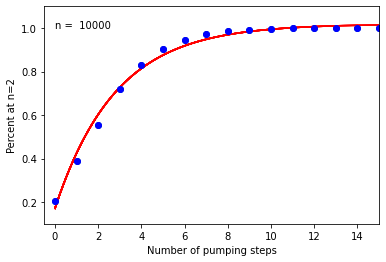

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.optimize import curve_fit


Rbnum = 10000
pumpsteps = np.empty(Rbnum)

for i in range(Rbnum):
    count = 0
    M = random.randint(-2, 2)
    while M != 2:
        M = M+1
        if M == 2:
            inc = random.randint(-1, 0)
        else:
            inc = random.randint(-1, 1)
        M = M + inc
        count = count + 1
    pumpsteps[i] = count
pumpsteps = pd.DataFrame(pumpsteps)
y = pumpsteps.value_counts()
y = y/Rbnum
fracat2 = np.zeros(0)
sum = 0;
y = np.array(y)
fracat2 = np.zeros(0)
for i in range(len(y)):
    y=sorted(y, reverse=True)
    sum = sum + y[i]
    fracat2 = np.append(fracat2, sum)
y = pd.DataFrame(y)
z = np.zeros(0)
z = np.append(z, y.index)
plt.scatter(z, fracat2)


def capacitor_charge(t, a, tau, c):
    return a * (1 - np.exp(-t/tau)) + c

popt, pcov = curve_fit(capacitor_charge, z, fracat2)

minfit = np.linspace(0, z+1, 64)

print(popt)

plt.ylim(0.1, 1.1)
plt.xlim(-0.5, 15)

plt.plot(minfit, capacitor_charge(minfit, *popt), 'r-', label='fit')
plt.plot(z, fracat2, 'bo') #data
plt.text(0, 1, f'n =  {Rbnum}')
plt.xlabel('Number of pumping steps')
plt.ylabel('Percent at n=2')
#plt.savefig("q2b.png")